Naive Bayes Accuracy: 0.5204
Classification Error: 0.4796
Precision: 0.3397
Recall (Sensitivity / TPR): 0.9557
Specificity (TNR): 0.3736
False Positive Rate (FPR): 0.6264

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.37      0.54      6767
           1       0.34      0.96      0.50      2282

    accuracy                           0.52      9049
   macro avg       0.65      0.66      0.52      9049
weighted avg       0.80      0.52      0.53      9049



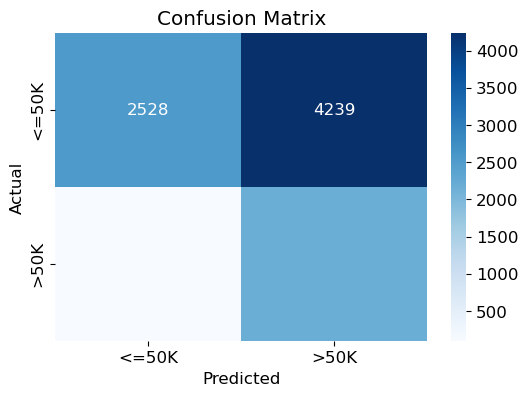

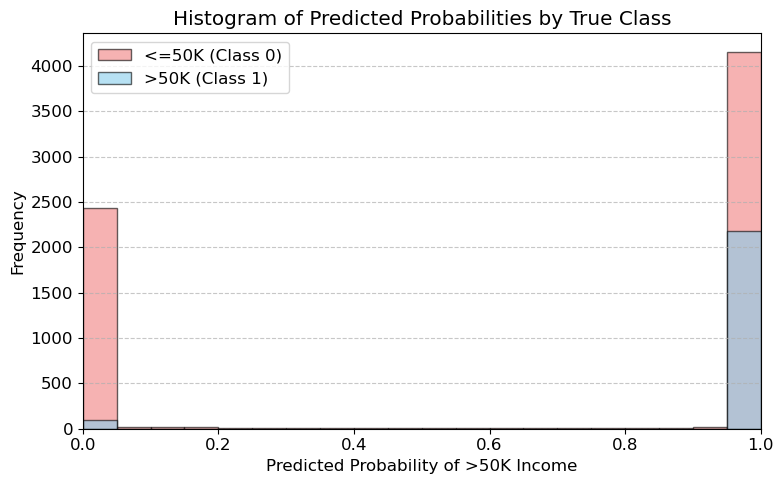

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset with column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race',
                'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                'native_country', 'income']

df = pd.read_csv('adult (1).csv', header=None, names=column_names, na_values='?', skipinitialspace=True)
df.columns = df.columns.str.strip()
df.dropna(inplace=True)

# Step 2: Split features and target
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Convert to binary

# Step 3: Define categorical and numerical columns
categorical_features = ['workclass', 'education', 'marital_status', 'occupation',
                        'relationship', 'race', 'sex', 'native_country']
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Step 4: Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Step 5: Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Transform
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Step 7: Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 8: Predict
y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # probability of class 1 (>50K)

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Step 10: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity / TPR
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
tpr = recall

# Step 11: Print Metrics
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Classification Error: {error:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity / TPR): {recall:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 13: Histogram of Predicted Probabilities
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size'] = 12

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 5))
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.6, label='<=50K (Class 0)', color='lightcoral', edgecolor='black')
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.6, label='>50K (Class 1)', color='skyblue', edgecolor='black')

# Add labels, title, legend
plt.title('Histogram of Predicted Probabilities by True Class')
plt.xlabel('Predicted Probability of >50K Income')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

